In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Exploratory Data Analysis

In [2]:
raw_data = pd.read_csv("housing.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
raw_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
raw_data.describe()#['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(array([   5.,    4.,    5.,    9.,   13.,   48.,   90.,  165.,  274.,
         264.,  323.,  353.,  258.,  288.,  406.,  397.,  482.,  399.,
         337.,  369.,  453.,  359.,  360.,  355.,  351.,  485.,  428.,
         387.,  419.,  502.,  563.,  397.,  442.,  344.,  407.,  410.,
         403.,  300.,  252.,  253.,  303.,  317.,  303.,  358.,  310.,
         268.,  272.,  236.,  227.,  210.,  200.,  234.,  223.,  240.,
         173.,  158.,  167.,  153.,  112.,  104.,   99.,  125.,  105.,
         127.,  111.,  134.,  118.,  134.,  107.,  179.,   91.,  102.,
          94.,   66.,   82.,   67.,   65.,   52.,   69.,   64.,   48.,
          56.,   47.,   52.,   41.,   39.,   50.,   40.,   44.,   62.,
          33.,   33.,   22.,   27.,   29.,   22.,   30.,   17.,   19.,
        1011.]),
 array([ 14999.  ,  19849.02,  24699.04,  29549.06,  34399.08,  39249.1 ,
         44099.12,  48949.14,  53799.16,  58649.18,  63499.2 ,  68349.22,
         73199.24,  78049.26,  82899.28,  87749.3 ,  9

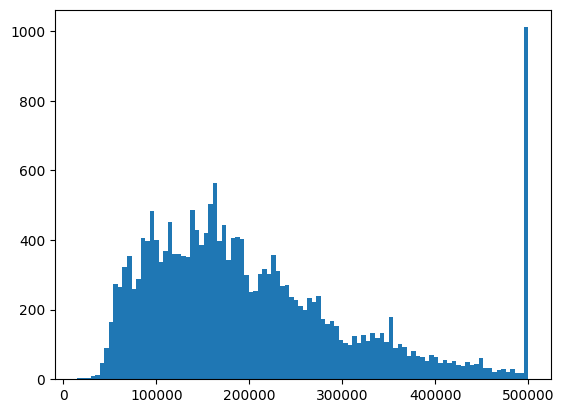

In [5]:
plt.hist(raw_data['median_house_value'].values, bins=100)

In [6]:
raw_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
columns = ['latitude', 'longitude', 'housing_median_age', 
           'total_rooms', 'total_bedrooms', 'population',
           'households', 'median_income', 'median_house_value']

sample_data = raw_data[(raw_data["ocean_proximity"]=="<1H OCEAN") | (raw_data["ocean_proximity"]=="INLAND")].loc[:, columns]


#### HomeWork Solutions

##### Question 1: There's one feature with missing values. What is it?

In [8]:
print("Feature with missing values: ", sample_data.isnull().sum().index[sample_data.isnull().sum()!=0][0])

Feature with missing values:  total_bedrooms


##### Question 2: What's the median (50% percentile) for variable 'population'?

In [9]:
print("The median (50% percentile) for variable [population]: ", sample_data["population"].median())

The median (50% percentile) for variable [population]:  1195.0


In [10]:
# # # # # # # # # # # # # # # # # # # # # 
# # # Prepare and split the dataset # # # 
# # # # # # # # # # # # # # # # # # # # #
np.random.seed(42) 
random_indexes = np.random.permutation(len(sample_data))
# # # # # # # # # # # # # # # # # # # # #
train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
    int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
# # # # # # # # # # # # # # # # # # # # #
sample_data["median_house_value"] = np.log1p(sample_data["median_house_value"].values)
# # # # # # # # # # # # # # # # # # # # #
train_data = sample_data.iloc[random_indexes[train_split], :]
val_data = sample_data.iloc[random_indexes[val_split], :]
test_data = sample_data.iloc[random_indexes[test_split], :]
# # # # # # # # # # # # # # # # # # # # #
sample_data.shape, train_data.shape, val_data.shape, test_data.shape

((15687, 9), (9412, 9), (3137, 9), (3138, 9))

In [11]:
sample_data.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

##### Question 3: 

In [12]:
def linear_regression_solve(X, y, reg_lambda=0.0):
    return np.linalg.inv(X.T@X + reg_lambda*np.eye(X.shape[1])) @ X.T @ y

def metric_mse(y_pred, y_true):
    return ((y_true-y_pred)**2).mean()

def metric_rmse(y_pred, y_true):
    return np.sqrt(((y_true-y_pred)**2).mean())

def metric_mae(y_pred, y_true):
    return np.abs(y_true-y_pred).mean()

def regression_analysis(y_pred, y_true):
    return metric_mae(y_pred, y_true), metric_mse(y_pred, y_true), metric_rmse(y_pred, y_true)

In [13]:
options = ['0', 'mean']

for option in options:
    if option == '0':
        train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
        val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
        test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    elif option == 'mean':
        train_x, train_y = train_data.fillna(train_data["total_bedrooms"].mean()).iloc[:, :-1], train_data.iloc[:, -1]
        val_x, val_y = val_data.fillna(train_data["total_bedrooms"].mean()).iloc[:, :-1], val_data.iloc[:, -1]
        test_x, test_y = test_data.fillna(train_data["total_bedrooms"].mean()).iloc[:, :-1], test_data.iloc[:, -1]
    else: raise KeyError("Required functionality is not coded yet")
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), np.array(train_y).reshape(-1, 1))
    y_pred_val = np.array(val_x) @ model_weights
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Option = {option} | MAE = {mae} | MSE = {mse} | !!! RMSE = {rmse} ")

# # # Both options are equally good

Option = 0 | MAE = 0.26481080189054546 | MSE = 0.12183077085942966 | !!! RMSE = 0.34904264905514004 
Option = mean | MAE = 0.2646372269652296 | MSE = 0.12173148238119563 | !!! RMSE = 0.34890039034256703 


##### Question 4:

In [14]:
reg_lambdas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    
for reg_lambda in reg_lambdas:
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), 
                                            np.array(train_y).reshape(-1, 1), 
                                            reg_lambda=reg_lambda)
    y_pred_val = np.array(val_x) @ model_weights
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Reg = {reg_lambda} | MAE = {mae} | MSE = {mse} | !!! RMSE = {np.round(rmse, decimals=2)} ")

Reg = 0 | MAE = 0.26481080189054546 | MSE = 0.12183077085942966 | !!! RMSE = 0.35 
Reg = 1e-06 | MAE = 0.2648108018908419 | MSE = 0.12183077085951295 | !!! RMSE = 0.35 
Reg = 0.0001 | MAE = 0.2648108019224606 | MSE = 0.1218307708689273 | !!! RMSE = 0.35 
Reg = 0.001 | MAE = 0.2648108022095188 | MSE = 0.1218307709540948 | !!! RMSE = 0.35 
Reg = 0.01 | MAE = 0.2648108050802353 | MSE = 0.1218307718060566 | !!! RMSE = 0.35 
Reg = 0.1 | MAE = 0.2648108337878169 | MSE = 0.12183078032878086 | !!! RMSE = 0.35 
Reg = 1 | MAE = 0.26481112086048597 | MSE = 0.12183086584816058 | !!! RMSE = 0.35 
Reg = 5 | MAE = 0.26481239667168377 | MSE = 0.12183125235630013 | !!! RMSE = 0.35 
Reg = 10 | MAE = 0.26481399128071365 | MSE = 0.12183175022521568 | !!! RMSE = 0.35 


##### Question 5:

In [15]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_history = []
for seed in seeds:
    np.random.seed(seed) 
    random_indexes = np.random.permutation(len(sample_data))
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
        int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    sample_data["median_house_value"] = np.log1p(sample_data["median_house_value"].values)
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_data = sample_data.iloc[random_indexes[train_split], :]
    val_data = sample_data.iloc[random_indexes[val_split], :]
    test_data = sample_data.iloc[random_indexes[test_split], :]
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
    val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
    test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), np.array(train_y).reshape(-1, 1))
    y_pred_val = np.array(val_x) @ model_weights
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Option = {option} | MAE = {mae} | MSE = {mse} | !!! RMSE = {rmse} ")
    rmse_history.append(rmse)

print(f"\nMean RMSE = {np.mean(rmse_history)} | Std RMSE = {np.round(np.std(rmse_history), decimals=3)}\n")

Option = mean | MAE = 0.020263180313618855 | MSE = 0.0007261700621445223 | !!! RMSE = 0.026947542784909392 
Option = mean | MAE = 0.006870501453235042 | MSE = 8.441219832495817e-05 | !!! RMSE = 0.009187611132658922 
Option = mean | MAE = 0.003954633192441747 | MSE = 2.8972891568647557e-05 | !!! RMSE = 0.005382647264000081 
Option = mean | MAE = 0.0027990812358006057 | MSE = 1.4839354029765102e-05 | !!! RMSE = 0.003852188213180283 
Option = mean | MAE = 0.0021540220622224943 | MSE = 8.974624226874857e-06 | !!! RMSE = 0.002995767719112224 
Option = mean | MAE = 0.001803629159247273 | MSE = 6.568482277472377e-06 | !!! RMSE = 0.0025629050465189648 
Option = mean | MAE = 0.0015270793121282102 | MSE = 4.599198755679378e-06 | !!! RMSE = 0.0021445742597726424 
Option = mean | MAE = 0.0013464618356048839 | MSE = 3.6542986632986793e-06 | !!! RMSE = 0.0019116219980159987 
Option = mean | MAE = 0.0011788560793224042 | MSE = 2.8534799780926344e-06 | !!! RMSE = 0.0016892246677374311 
Option = mean |

##### Question 6:

In [16]:
np.concatenate((np.array(train_x), np.array(val_x))).shape

(12549, 8)

In [17]:
np.random.seed(9) 
random_indexes = np.random.permutation(len(sample_data))
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
    int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
sample_data["median_house_value"] = np.log1p(sample_data["median_house_value"].values)
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_data = sample_data.iloc[random_indexes[train_split], :]
val_data = sample_data.iloc[random_indexes[val_split], :]
test_data = sample_data.iloc[random_indexes[test_split], :]
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
model_weights = linear_regression_solve(np.concatenate((np.array(train_x), np.array(val_x))), 
                                        np.concatenate((np.array(train_y), np.array(val_y))).reshape(-1, 1),
                                        reg_lambda=0.001)
y_pred_test = np.array(test_x) @ model_weights
mae, mse, rmse = regression_analysis(y_pred=y_pred_test, y_true=np.array(test_y).reshape(-1, 1))
print(f"MAE = {mae} | MSE = {mse} | !!! RMSE = {rmse} ")

MAE = 0.0009545322243542516 | MSE = 1.8067538053582778e-06 | !!! RMSE = 0.0013441554245541242 
